# Using Computer Vision to Diagnose Pneumonia 

In this project, PyTorch is used to create and train Convolutional Neural Networks (CNN's) to classify X-Ray image data.

## Table of Contents
* [Introduction](#intro)

* [Data Overview](#chapter1)

* [Image Augmentations](#chapter1.1)
    
* [Modeling](#chapter2)

* [Metrics](#chapter3)

* [Summary](#chapter4)



# What is Pneumonia?  <a class="anchor" id="intro"></a>

Before we dive into the data, let's take a brief look at medical condition we will be trying to diagnose. 
> If you are already an expert, feel free to skip ahead using the Table of Contents!



Pneumonia is an infection that affects one or both lungs. Potential causes include Bacteria, Viruses, or Fungi. Here is a visual from the National of Health which depicts some of its characteristics. 

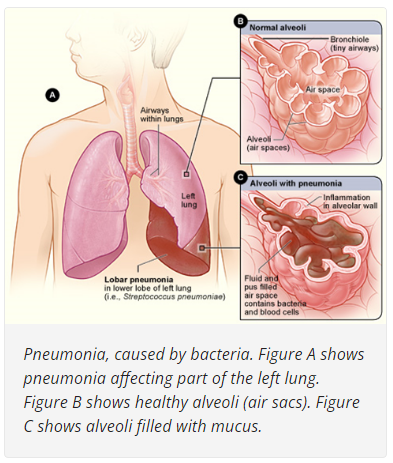



A quick google search will show you that Pneumonia is very common in the United States and around the world. People under 2 or over 65 are more likely to be at risk, but all ages can be affected. 

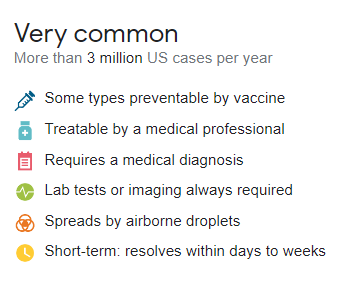

Symptoms include:
* Cough and Chest Pain

* Shortness of Breath

* Fever, Nausea, Fatigue



Pneumonia is the deadliest infectious condition in children worldwide (740,180 deaths reported in 2019).
For more information, here is the link to the World Health Organization's Pneumonia page:

https://www.who.int/news-room/fact-sheets/detail/pneumonia






# Goal

As we have seen over the past few years, medical facilities can become overwhelmed during pandemics and other periods with high rates of disease. Technologies that ease or speed up the work necessary to diagnose and treat patients could have tremendous value.   

Our goal was to create a model to identify Pneumonia in X-Ray Images. Currently, X-Ray imaging plays a  large role in how the infection is currently diagnosed, so a well performing model could be useful for hospitals in assisting ease the workload of doctors and technicians.

# Data Overview <a class="anchor" id="chapter1"></a>

Our data was comprised of over 5800 images of X-Ray scans which had been labeled by doctors. This was found on Kaggle, and originally came from researchers out of University of California, San Diego. 
> https://data.mendeley.com/datasets/rscbjbr9sj/2 


The training dataset consisted of 5216 Images:

* 3875 - Pneumonia
* 1341 - Normal


Much of the data work explored ways to address this class imbalance. 


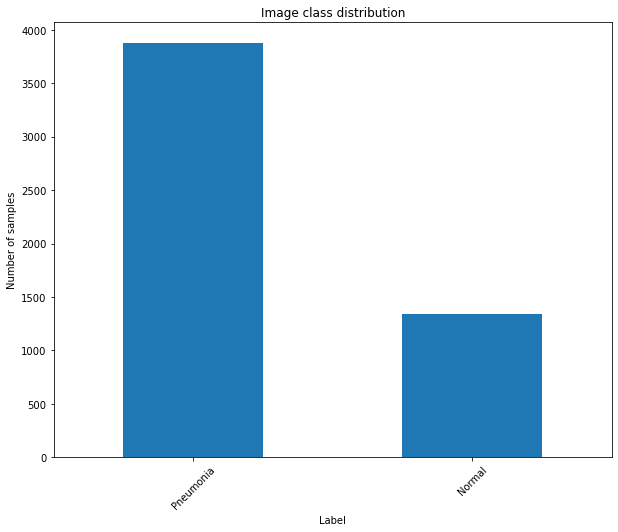

Here is an example of an image from our training data. 

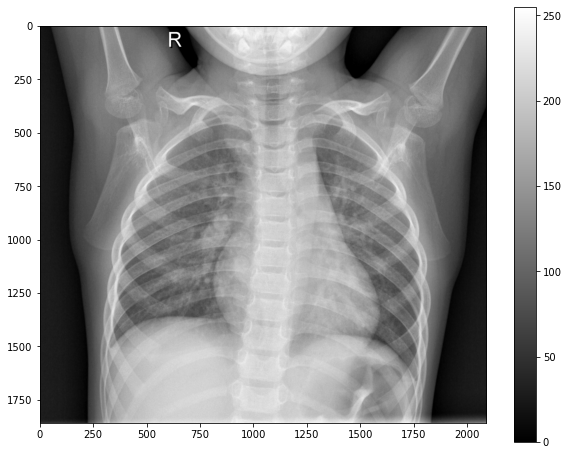

I am not a doctor, so I had no idea how the scans currenly are used. The following illustration came from the Mayo Clinic's "Pneumonia Diagnosis and Treatment" page, and includes a description of what a doctor looks for in an X-Ray to diagnose Pneumonia.

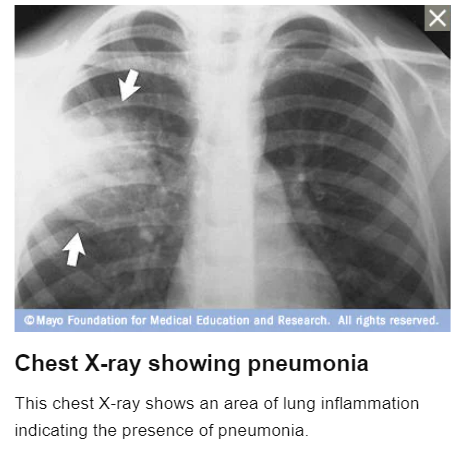

Lets take a look at some more examples of our training data, along with their labels. 

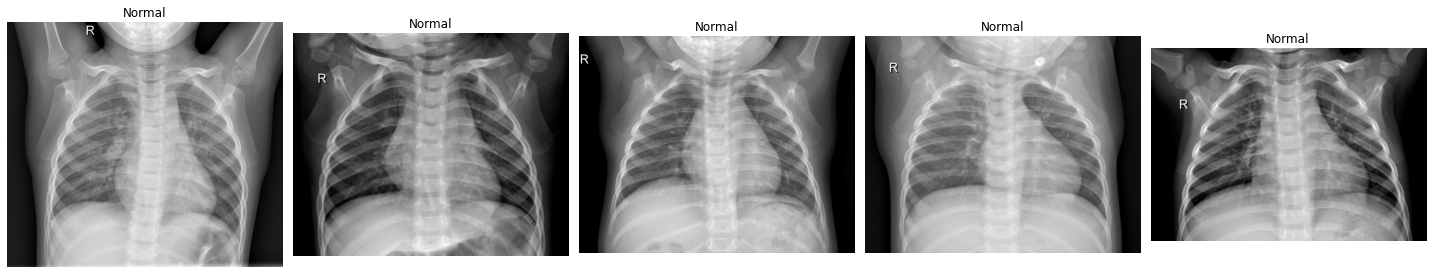

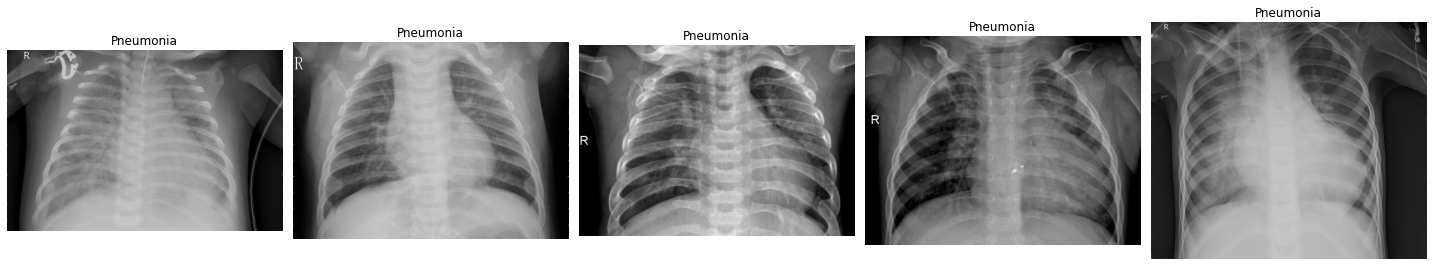

To my untrained eye, I have a hard time seeing any clear differences between the first row of images and the second row of images. They all just look like X-Rays to me!

Our model doesn't have an M.D. either, but hopefully it will be able to glean some insights that allow it to make accurate classifications. 

# Image Augmentations <a class="anchor" id="chapter1.1"></a>

As we saw in the previous section, our data had a noticable class imbalance, with nearly 3 'Pneumonia' images for every 'Normal' image. One way of addressing this is to modify images in the lesser represented class, similulating the effect of taking more 'Normal' X-Rays. 

To do this we used the torchvision transforms library. There are numerous transformation methods, some of which involve pretty dramatic changes to the original data. Because this project involves the medical domain, it was a goal to keep the transformations as plausible and “realistic” as possible. 

As an example, here is a grid 4 images which used a composition including

* Random Inversions
* Random Resized Cropping
* Rotations of up to 60°

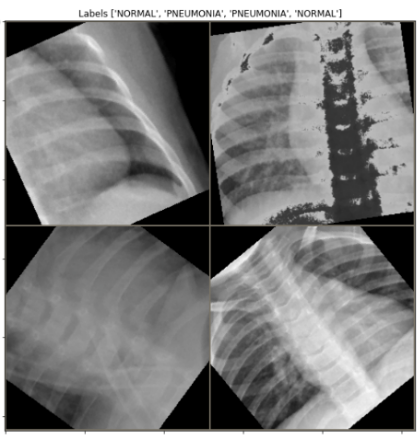

They don’t look very similar to the original data. It should be noted that having such dramatic transformations isn't always bad for model performance. Still, for this project we tried to avoid this.

Instead, we used compositions of transforms which adjusted or added things like
* Brightness, Contrast, Saturation 
* Blur
* Minor Rotations

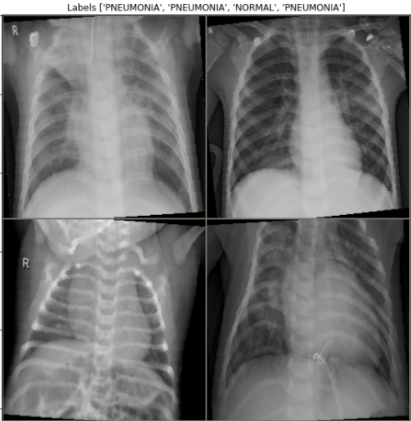

These much more closely resemble the original data.

*Resizing and Normalization*

As you can see in the rows of images earlier, the images are not all the same size. Before feeding them into our model, the images were resized to be uniform. The channel values were also normalized using the mean and std from the ImageNet dataset, which would be useful for transfer learning. 

With this, our data was ready to be batched for training. Below is an example of a batch with size 16. 

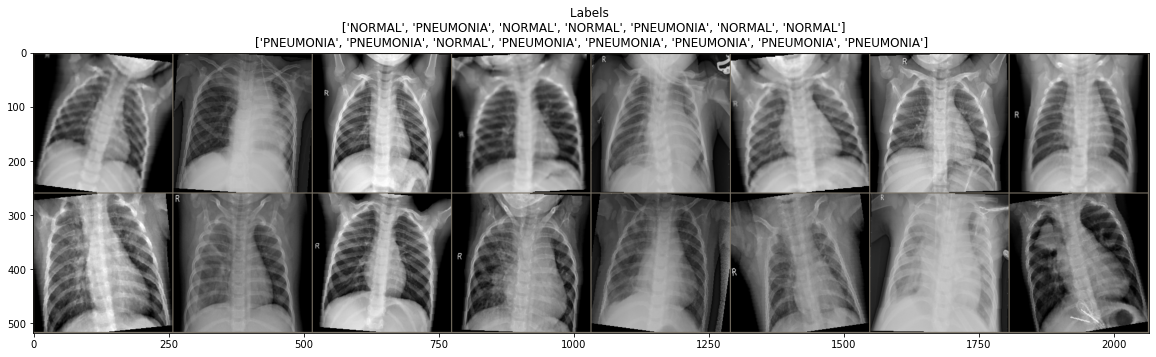

# Modeling <a class="anchor" id="chapter2"></a>

Like many projects involving Computer Vision, we employed Convolutional Neural Networks to build the classification model.
These are used in many common technologies, such as facial recognition. 


We experimented with 2 different approaches. 

1: Building a smaller model from scratch. 

2: Altering a larger, existing model to fit our data
(Transfer Learning)


Typically, a much larger dataset is required to train a model from scratch. We used the first method to create a baseline reference, and eventually moved on to the second approach. Full information on the models' architectures can be found in the 'model_metrics.txt' file. 

### CNN from scratch 

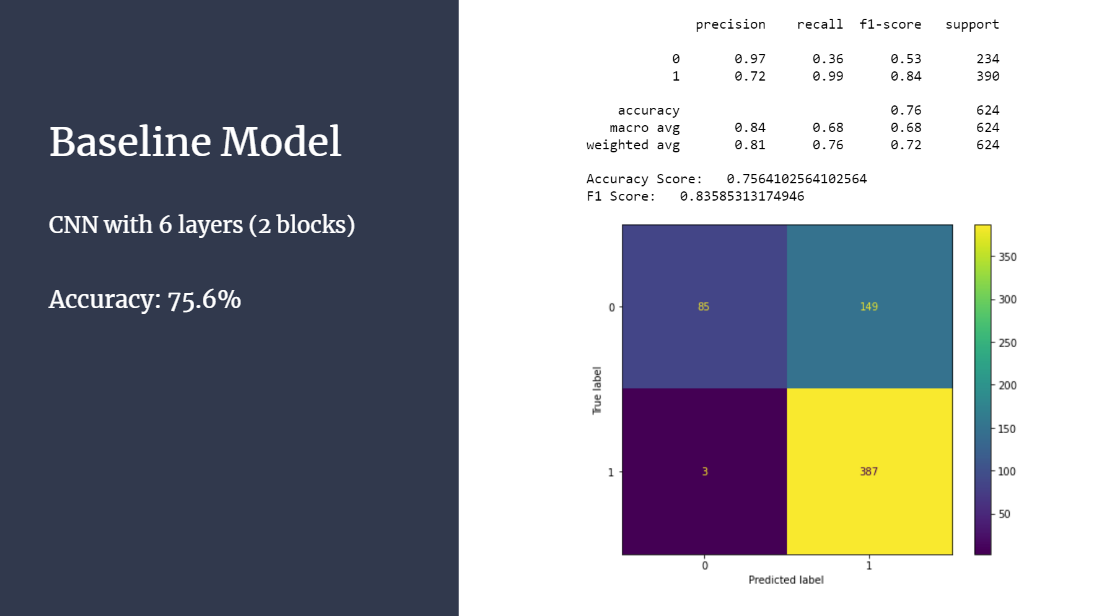

### Transfer Learning with Resnet18 and Resnet50

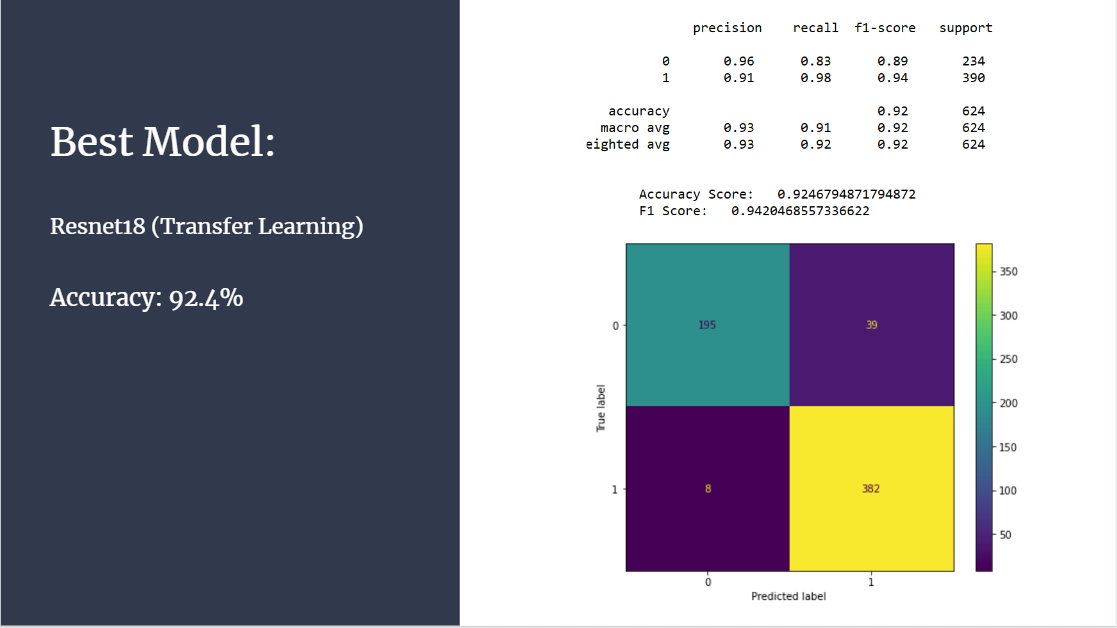

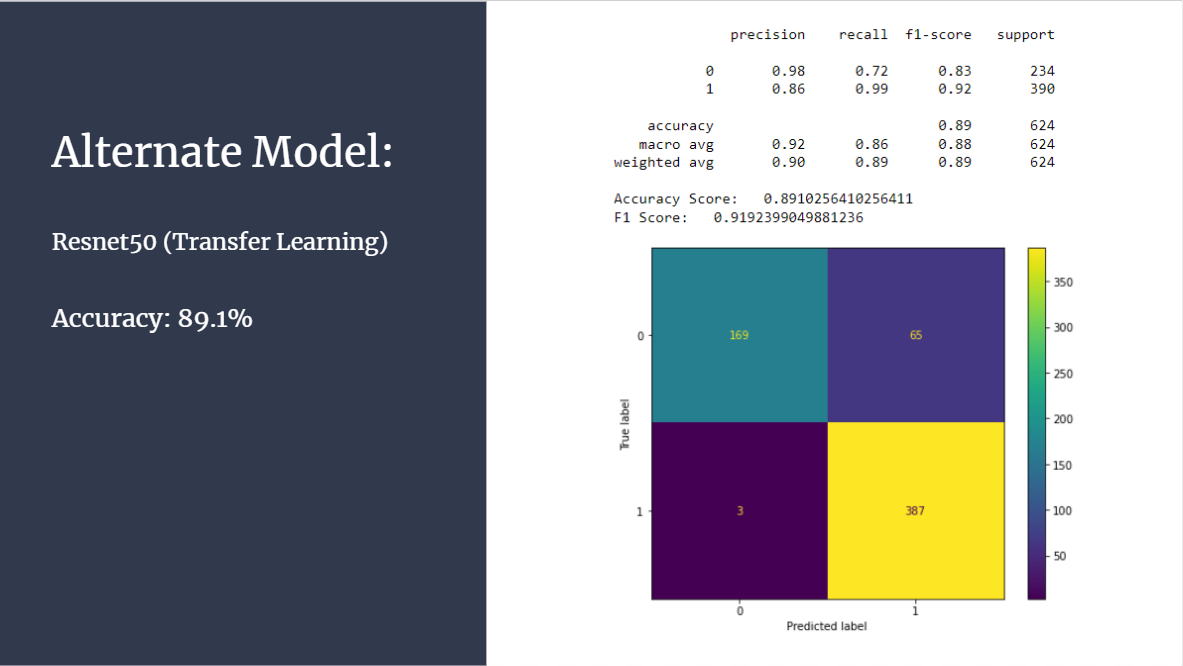

## Remarks on Model Performance

As you can see in the confusion matricies, accuracy alone doesn't necessarily tell the full story. The baseline model actually had about the same precision with regards to the "Normal" class as did the much larger models. 

> The key thing to remember here is that judging model performance largely depends on the client's intended use.

If the model was intended to be the final decider in whether a patient gets checked out for treatment, then minimizing the amount of False Negatives would be a main priority. In this scenario, the Resnet50 model would probably be considered the best model. 

We envisioned more of a scenario where the model could be used as a way to help optimize the use of time and resources for physicians/medical staff, especially during busy seasons. For example, if a lab is overwhelmed, the model's predictions could help direct how to make the best use of resources.

These are all complete hypotheticals of course, this is just the kind of thinking that went into labeling the resnet18 model as our best model. One other consideration is the computational requirements. If for example we were able to obtain much more data for training, the Resnet50 model took nearly 2.5x the time to train as did the Resnet18 model. 

> One potential future addition could be to add a threshold such that, for some probability X, the model only makes a prediction when it has above X confidence in the prediction. This could be implemented a couple different ways, but effectively would make a defacto 3rd class, so the output would be one of ("Normal", "Pneumonia", "Needs further review").

# Final Takeaways <a class="anchor" id="chapter4"></a>


Using neural networks as a diagnostic tool shows remarkable promise. We were able to create a model with over 92% accuracy, having relatively little training data. According to the WHO, there are ~1.4 billion chest x-rays taken each year. We used fewer than 6 thousand for this project. The diversity of metrics also helped to give an idea of the way models could be tuned depending on a specific intened use. As the recent pandemic has shown, medical personnel shortages can occur, leaving hospitals overwhelmed. Technology such as the model created in this project could have tremendous value in helping diagnose and inform treatment care. 



Thank you for reading! 

### References:

Mayo Clinic:

https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes

National Institute of Health (NIH):

https://www.nhlbi.nih.gov/health/pneumonia

World Health Organization (WHO):

https://www.who.int/news-room/fact-sheets/detail/pneumonia
https://www.wipo.int/edocs/pubdocs/en/wipo_pub_gii_2019-chapter8.pdf

